<a href="https://colab.research.google.com/github/Chandrashekar0123/Deep_Learning/blob/Natural_Language_Processing/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


In [ ]:
# Load IMDB dataset
vocab_size = 10000 # Only top 10,000 words
max_length = 200 # Limit each review to 200 words


In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Pad sequences to ensure uniform input size for LSTM
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length))
model.add(GRU(units=128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.7012 - loss: 0.5338 - val_accuracy: 0.8547 - val_loss: 0.3427
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8978 - loss: 0.2558 - val_accuracy: 0.8792 - val_loss: 0.2985
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9401 - loss: 0.1633 - val_accuracy: 0.8746 - val_loss: 0.3200
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9664 - loss: 0.1004 - val_accuracy: 0.8530 - val_loss: 0.4039
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9809 - loss: 0.0594 - val_accuracy: 0.8661 - val_loss: 0.4138


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8622 - loss: 0.4205
Test Accuracy: 86.61%


In [ ]:
# Plot training & validation accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


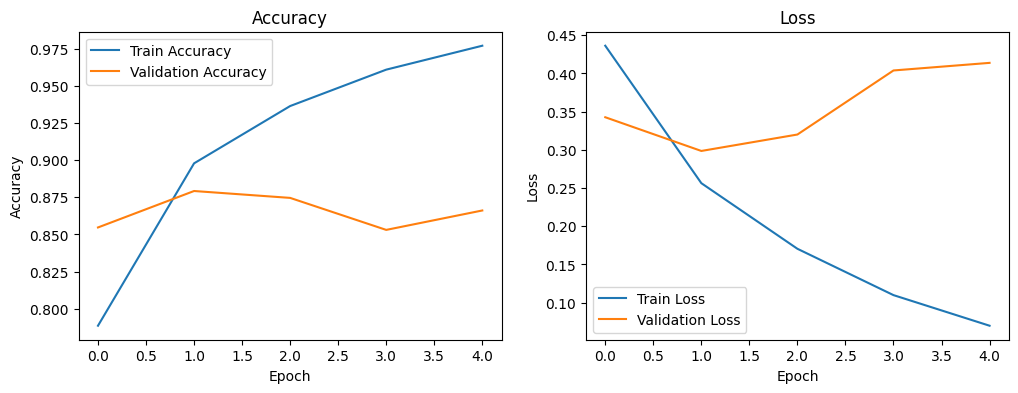

In [ ]:
# Display training history
plot_history(history)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Tokenizer to convert words to integer indices
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(imdb.get_word_index())


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
def preprocess_review(review):
    # Convert review to a sequence of integers
    review_seq = tokenizer.texts_to_sequences([review])
    # Pad the sequence
    return pad_sequences(review_seq, maxlen=max_length)


In [ ]:
def predict_sentiment(review):
    # Preprocess the review
    processed_review = preprocess_review(review)
    # Predict sentiment
    prediction = model.predict(processed_review)
    # Convert prediction to binary outcome (0: negative, 1: positive)
    sentiment = 'Positive' if prediction > 0.5 else 'Negative'
    return sentiment


In [ ]:
# Example usage
review = "This movie was fantastic! I really enjoyed it."
sentiment = predict_sentiment(review)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
Review: This movie was fantastic! I really enjoyed it.
Sentiment: Positive


In [ ]:
# Example usage
review = "This movie was worst."
sentiment = predict_sentiment(review)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Review: This movie was worst.
Sentiment: Positive


In [ ]:
# Example usage
review = "This movie was neither good nor bad."
sentiment = predict_sentiment(review)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Review: This movie was neither good nor bad.
Sentiment: Positive


In [ ]:
# Example usage
review = "This movie was Amazing"
sentiment = predict_sentiment(review)
print(f'Review: {review}')
print(f'Sentiment: {sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Review: This movie was Amazing
Sentiment: Positive
